In [1]:
import mlflow
import pandas as pd
import mlflow.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

In [ ]:
df = pd.read_csv('Twitter_Data.csv')
# df = df.sample(500)
# df.to_csv('data.csv', index=False)
df.head()
df = df.dropna()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [119]:
import emoji

def clean_text(text):
    if not isinstance(text, str):
        return "" 
    
    # 1. Convert to lowercase
    text = text.lower()
    
    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove mentions (@user)
    text = re.sub(r'@\w+', '', text)

    # 4. Remove hashtags (#hashtag) but keep the word
    text = re.sub(r'#', '', text)

    # 5. Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # 6. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 7. Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # 8. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def remove_stop_words(text):
    if not isinstance(text, str):
        return ""
    
    stop_words = set(stopwords.words("english"))
    words = [word for word in text.split() if word not in stop_words]
    return " ".join(words)



In [133]:
df['clean_text'] = df['clean_text'].apply(clean_text)


In [121]:
df.sample(10)

,clean_text,category
91913,narendra modi bindis viral before lok sabha el...,1
153174,amit shah claims gandhi has fled kerala becaus...,2
146022,main bhi chawkidar join modi along with lakhs ...,2
9301,may your choice about contest election but sho...,0
13477,they should\nwhat modi today due advani\nand c...,2
96750,this years ipl and elections both full contrav...,0
150280,called violation election code conduct but cou...,1
12578,not fan rahul but more educated than modi for ...,2
90753,one the best cartoon congressit must used bann...,2
101688,dont know how but gut feeling telling that bjp...,1


In [131]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])


In [132]:

# Remove rows where the label is empty or invalid
df['category'].value_counts()


category
2    72249
1    55211
0    35509
Name: count, dtype: int64

In [106]:
df.head()

,clean_text,category
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp to...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0


In [32]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

In [ ]:
vectorizer = CountVectorizer(max_features=100)
X = vectorizer.fit_transform(df['clean_text'])
y = df['category'].astype('int').to_numpy()
y

array([ 0,  1, -1,  0, -1,  1,  1, -1, -1,  0,  1,  1,  1,  0, -1,  1,  1,
       -1,  1,  1,  1,  1,  0,  0,  0,  1,  1,  1,  1,  1, -1,  1, -1, -1,
        0,  1,  0,  1,  1, -1,  0,  1,  1,  1,  1,  1,  0,  1, -1,  0,  0,
        1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  0, -1,  0, -1,
        0,  0,  1, -1,  0,  1,  0,  1,  1, -1,  0,  0,  1, -1, -1,  1,  1,
        1,  1, -1,  0,  0, -1,  0,  1,  0, -1,  1, -1,  1, -1,  1,  0,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  1, -1,  1,  1,
        1,  0,  1,  0,  0,  1, -1,  1, -1,  0,  0,  1,  1,  0,  0,  1,  0,
        1, -1,  1,  1,  0,  1,  0,  0,  1,  1, -1,  0, -1,  1,  1,  0,  0,
        1,  0,  1,  1, -1,  1,  1,  1,  1,  1, -1,  0,  0, -1,  1,  1,  0,
        1,  0, -1,  0,  1,  1,  1,  1,  0,  1,  1,  0,  1,  0,  1,  1,  1,
       -1,  0,  0,  1, -1, -1,  0, -1,  1,  1,  0,  0, -1,  1,  1,  1,  0,
        1,  0,  1,  0,  0,  0,  1,  0, -1,  0, -1,  1,  0,  0,  0,  0,  1,
        0, -1, -1,  0,  1

In [10]:
X.shape
from sklearn.model_selection import train_test_split

X_train,  X_test ,y_train , y_test = train_test_split(X ,y , test_size= 0.25)

2025-04-07 19:25:16,610 - INFO - Starting MLflow run...
2025-04-07 19:25:17,233 - INFO - Logging preprocessing parameters...
2025-04-07 19:25:17,251 - INFO - Initializing Logistic Regression model...
2025-04-07 19:25:17,251 - INFO - Fitting the model...
c:\Users\super\Desktop\DVC\Twitter-Analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
2025-04-07 19:25:17,315 - INFO - Model training complete.
2025-04-07 19:25:17,315 - INFO - Logging model parameters...
2025-04-07 19:25:17,326 - INFO - Making predictions...
2025-04-07 19:25:17,330 - INFO - Calculating evaluation metrics...
2025-04-07 19:25:17,333 - INFO - Logging evaluation metrics...
2025-04-07 19:25:17,343 - INFO - Saving and logging the model...
2025/04/07 19:25:33 WARNING mlflow.models.model: Input example s

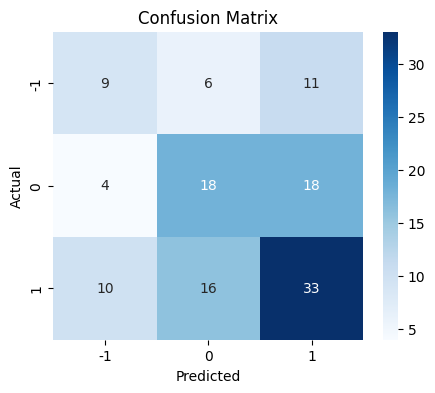

In [11]:
import mlflow
import logging
import os
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

logging.info("Starting MLflow run...")

mlflow.set_tracking_uri("file:///" + os.path.abspath("mlruns").replace("\\", "/"))

mlflow.set_experiment("Twitter-Sentiment")  
with mlflow.start_run():
    start_time = time.time()

    try:
        logging.info("Logging preprocessing parameters...")
        mlflow.log_param("vectorizer", "Bag of Words")
        mlflow.log_param("num_features", 100)
        mlflow.log_param("test_size", 0.25)

        logging.info("Initializing Logistic Regression model...")
        model = LogisticRegression(multi_class='auto',max_iter=1000)  # Increase max_iter to prevent non-convergence issues

        logging.info("Fitting the model...")
        model.fit(X_train, y_train)
        logging.info("Model training complete.")

        logging.info("Logging model parameters...")
        mlflow.log_param("model", "Logistic Regression")

        logging.info("Making predictions...")
        y_pred = model.predict(X_test)

        logging.info("Calculating evaluation metrics...")
        accuracy = accuracy_score(y_test, y_pred)


        logging.info("Logging evaluation metrics...")
        mlflow.log_metric("accuracy", accuracy)
        

        logging.info("Saving and logging the model...")
        mlflow.sklearn.log_model(model, "model")

        # Log execution time
        end_time = time.time()
        logging.info(f"Model training and logging completed in {end_time - start_time:.2f} seconds.")

        # Save and log the notebook
        # notebook_path = "exp1_baseline_model.ipynb"
        # logging.info("Executing Jupyter Notebook. This may take a while...")
        # os.system(f"jupyter nbconvert --to notebook --execute --inplace {notebook_path}")
        # mlflow.log_artifact(notebook_path)

        # logging.info("Notebook execution and logging complete.")

        # Print the results for verification
        logging.info(f"Accuracy: {accuracy}")




        precision_macro = precision_score(y_test, y_pred, average='macro')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        f1_macro = f1_score(y_test, y_pred, average='macro')

        precision_micro = precision_score(y_test, y_pred, average='micro')
        recall_micro = recall_score(y_test, y_pred, average='micro')
        f1_micro = f1_score(y_test, y_pred, average='micro')

        precision_weighted = precision_score(y_test, y_pred, average='weighted')
        recall_weighted = recall_score(y_test, y_pred, average='weighted')
        f1_weighted = f1_score(y_test, y_pred, average='weighted')

        # Log them
        mlflow.log_metric("precision_macro", precision_macro)
        mlflow.log_metric("recall_macro", recall_macro)
        mlflow.log_metric("f1_macro", f1_macro)

        mlflow.log_metric("precision_micro", precision_micro)
        mlflow.log_metric("recall_micro", recall_micro)
        mlflow.log_metric("f1_micro", f1_micro)

        mlflow.log_metric("precision_weighted", precision_weighted)
        mlflow.log_metric("recall_weighted", recall_weighted)
        mlflow.log_metric("f1_weighted", f1_weighted)


        conf_matrix = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots(figsize=(5,4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[-1,0,1], yticklabels=[-1,0,1])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        conf_matrix_path = "conf_matrix.png"
        plt.savefig(conf_matrix_path)
        mlflow.log_artifact(conf_matrix_path)
    except Exception as e:
        logging.error(f"An error occurred: {e}", exc_info=True)

In [136]:
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
import mlflow.sklearn
import scipy.sparse

VECTORIZER = {
    'BOW': CountVectorizer(max_features=5000, min_df=5),
    'TF-IDF': TfidfVectorizer(max_features=5000, min_df=5)
}

ALGORITHMS = {
    'LogisticRegression' : LogisticRegression(),
    'MultinomialNB' : MultinomialNB(),
    'XGBosst' : XGBClassifier(),
    'Hist' : HistGradientBoostingClassifier(),
    'Lightgbm': LGBMClassifier(),
     
}

def train_and_evaluate(df):
    with mlflow.start_run(run_name = 'All Experiments Final') as parent_run:
        logging.info("Starting MLflow run...")
        for algo_name, algorithm in ALGORITHMS.items():
            for vec_name , vectorizer in VECTORIZER.items():
                with mlflow.start_run(run_name= f"{algo_name} with {vec_name}",nested=True) as child_run:
                    try:
                        X = vectorizer.fit_transform(df['clean_text'])
                      
                        y = df['category'].astype('int').to_numpy()
                        X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state= 42)
                        mlflow.log_params({
                            "vectorizer":  vec_name ,
                            "algorithm" : algo_name,
                            "test_size" : 0.25
                        })
                        model = algorithm
                        model.fit(X_train , y_train)
                        
                        y_pred = model.predict(X_test)
                        
                        metrics = {"accuracy" : accuracy_score(y_test, y_pred),
                        "precision_macro" : precision_score(y_test, y_pred, average='macro'),
                        "recall_macro" : recall_score(y_test, y_pred, average='macro'),
                        "f1_macro" : f1_score(y_test, y_pred, average='macro'),

                        "precision_micro" : precision_score(y_test, y_pred, average='micro'),
                        "recall_micro" : recall_score(y_test, y_pred, average='micro'),
                        "f1_micro" : f1_score(y_test, y_pred, average='micro'),

                        "precision_weighted" : precision_score(y_test, y_pred, average='weighted'),
                        "recall_weighted " : recall_score(y_test, y_pred, average='weighted'),
                        "f1_weighted" : f1_score(y_test, y_pred, average='weighted')}
                        
                        mlflow.log_metrics(metrics=metrics)

                        input_example = X_test[:5] if not scipy.sparse.issparse(X_test) else X_test[:5].toarray()
                        mlflow.sklearn.log_model(model, "model", input_example=input_example)
                        print(f"\nAlgorithm: {algo_name}, Vectorizer: {vec_name}")
                        print(f"Metrics: {metrics}")
                        
                        
                    except Exception as e:
                        print(f"Error in training {algo_name} with {vec_name} : {e}")    
                        mlflow.log_param("error",str(e))


train_and_evaluate(df=df)


2025-04-08 00:41:27,815 - INFO - Starting MLflow run...
c:\Users\super\Desktop\DVC\Twitter-Analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Algorithm: LogisticRegression, Vectorizer: BOW
Metrics: {'accuracy': 0.9385469718353071, 'precision_macro': 0.9332470466221938, 'recall_macro': 0.9304458399185297, 'f1_macro': 0.93167425394057, 'precision_micro': 0.9385469718353071, 'recall_micro': 0.9385469718353071, 'f1_micro': 0.9385469718353071, 'precision_weighted': 0.938231505970503, 'recall_weighted ': 0.9385469718353071, 'f1_weighted': 0.9382465938964685}


c:\Users\super\Desktop\DVC\Twitter-Analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Algorithm: LogisticRegression, Vectorizer: TF-IDF
Metrics: {'accuracy': 0.9236669325642757, 'precision_macro': 0.921138000258654, 'recall_macro': 0.9105353165170484, 'f1_macro': 0.9146475841707643, 'precision_micro': 0.9236669325642757, 'recall_micro': 0.9236669325642757, 'f1_micro': 0.9236669325642757, 'precision_weighted': 0.9237054471726895, 'recall_weighted ': 0.9236669325642757, 'f1_weighted': 0.9227714604353978}



Algorithm: MultinomialNB, Vectorizer: BOW
Metrics: {'accuracy': 0.8103638706510401, 'precision_macro': 0.8031088790109638, 'recall_macro': 0.798826695290194, 'f1_macro': 0.7995390737405695, 'precision_micro': 0.8103638706510401, 'recall_micro': 0.8103638706510401, 'f1_micro': 0.8103638706510401, 'precision_weighted': 0.814571497142578, 'recall_weighted ': 0.8103638706510401, 'f1_weighted': 0.811005342159667}



Algorithm: MultinomialNB, Vectorizer: TF-IDF
Metrics: {'accuracy': 0.7373136160029453, 'precision_macro': 0.8136423523156412, 'recall_macro': 0.6782562658431533, 'f1_macro': 0.7015032723951172, 'precision_micro': 0.7373136160029453, 'recall_micro': 0.7373136160029453, 'f1_micro': 0.7373136160029453, 'precision_weighted': 0.7858775237108121, 'recall_weighted ': 0.7373136160029453, 'f1_weighted': 0.7244956415823071}



Algorithm: XGBosst, Vectorizer: BOW
Metrics: {'accuracy': 0.8611094066392587, 'precision_macro': 0.8684377071594436, 'recall_macro': 0.8397294901503058, 'f1_macro': 0.845286965512579, 'precision_micro': 0.8611094066392587, 'recall_micro': 0.8611094066392587, 'f1_micro': 0.8611094066392587, 'precision_weighted': 0.8708206940902085, 'recall_weighted ': 0.8611094066392587, 'f1_weighted': 0.8586689696255156}



Algorithm: XGBosst, Vectorizer: TF-IDF
Metrics: {'accuracy': 0.866294410014113, 'precision_macro': 0.8723261751597357, 'recall_macro': 0.8452486710864835, 'f1_macro': 0.8509699988134972, 'precision_micro': 0.866294410014113, 'recall_micro': 0.866294410014113, 'f1_micro': 0.866294410014113, 'precision_weighted': 0.8742225752504648, 'recall_weighted ': 0.866294410014113, 'f1_weighted': 0.8638561694923341}
Error in training Hist with BOW : Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
Error in training Hist with TF-IDF : Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.
Error in training Lightgbm with BOW : Expected np.float32 or np.float64, met type(int64)



Algorithm: Lightgbm, Vectorizer: TF-IDF
Metrics: {'accuracy': 0.9034484874516783, 'precision_macro': 0.9039949039762956, 'recall_macro': 0.8879466085582992, 'f1_macro': 0.8929200377209222, 'precision_micro': 0.9034484874516783, 'recall_micro': 0.9034484874516783, 'f1_micro': 0.9034484874516783, 'precision_weighted': 0.9057864804815624, 'recall_weighted ': 0.9034484874516783, 'f1_weighted': 0.9021602634400505}


In [ ]:
df

,clean_text,category
53795,congratulations modi siranddrdo,0
17418,what great day start with was expecting either...,1
14127,pre election announces doles for poor after el...,-1
42999,everyone like modi address and all and twitter...,0
48972,pigs who say bharat teray tukde are your lover...,-1
...,...,...
132343,sir modi never said that will give everyone ne...,-1
97604,sure only one condition modi doesn take all th...,1
39183,you mean modishah saintso dont ask them anythi...,-1
42302,national serves notice makers narendra modi,0


In [127]:
df = df.dropna()

In [134]:
df

,clean_text,category
0,when modi promised minimum government maximum ...,0
1,talk all the nonsense and continue all the dra...,1
2,what did just say vote for modi welcome bjp to...,2
3,asking his supporters prefix chowkidar their n...,2
4,answer who among these the most powerful world...,2
...,...,...
162975,why these crores paid neerav modi not recovere...,0
162976,dear rss terrorist payal gawar what about modi...,0
162977,did you cover her interaction forum where she ...,1
162978,there big project came into india modi dream p...,1
